In [1]:
"""
Script with code for model prediction
"""
from pathlib import Path

from sahi import AutoDetectionModel
from sahi.predict import get_prediction, get_sliced_prediction, predict
import torch
import numpy as np
from tqdm import tqdm

In [2]:
from PIL import Image

In [3]:
from torchmetrics.detection.iou import IntersectionOverUnion

In [4]:
# os.environ['CUDA_VISIBLE_DEVICES'] = '0, 1'

In [125]:
yolov10_model_path = "/home/slava/LCT_24/random/sasha/10s_1280.pt"
# image_filename = "/home/slava/hdd/hdd4/Datasets/lct-drones/prod_data/images/00_09_30_to_00_10_09_931.png"

detection_model = AutoDetectionModel.from_pretrained(
    model_type="yolov10",
    model_path=yolov10_model_path,
    confidence_threshold=0.07,
    device="cuda:0",  # or 'cuda:0'
    agnostic_nms=False,
)

# result_sahi = get_sliced_prediction(
#     image_filename,
#     detection_model,
#     slice_height=640,
#     slice_width=640,
#     overlap_height_ratio=0.2,
#     overlap_width_ratio=0.2,
# )

# result_sahi.export_visuals(export_dir="demo_data/", file_name='prediction_visual_sahi')

# result = get_prediction(image_filename, detection_model)

# result.export_visuals(export_dir="demo_data/", file_name='prediction_visual')

# results = predict(
#     return_dict=True,
#     novisual=True,
#     model_type="yolov8",
#     model_path=yolov8_model_path,
#     model_device="cuda:1",  # or 'cuda:0'
#     model_confidence_threshold=0.4,
#     source="/home/slava/LCT_24/data/debug_images",
#     slice_height=640,
#     slice_width=640,
#     overlap_height_ratio=0.2,
#     overlap_width_ratio=0.2,
# )

In [126]:
from ultralytics import YOLO, YOLOv10

In [156]:
detection_model = YOLOv10(yolov10_model_path)

In [162]:
yolov8_model_path = "/home/slava/LCT_24/runs/v8n_1280_baseline_augs/weights/best.pt"
detection_model = YOLO(yolov8_model_path)


In [117]:
yolov8_model_path = "/home/slava/LCT_24/runs/v8n_1280_baseline_augs/weights/best.pt"
# image_filename = "/home/slava/hdd/hdd4/Datasets/lct-drones/prod_data/images/00_09_30_to_00_10_09_931.png"

detection_model = AutoDetectionModel.from_pretrained(
    model_type="yolov8",
    model_path=yolov8_model_path,
    confidence_threshold=0.7,
    device="cuda:0",  # or 'cuda:0'
)

In [7]:
detection_model.category_mapping

{'0': 'copter_type_uav',
 '1': 'aircraft',
 '2': 'helicopter',
 '3': 'bird',
 '4': 'aircraft_type_uav'}

In [8]:
detection_model.device

device(type='cuda', index=0)

In [163]:
image_filename = "/home/slava/LCT_24/data/bee.jpeg"

image = Image.open(image_filename)

In [164]:

# result_sahi = get_sliced_prediction(
#     image,
#     detection_model,
#     slice_height=640,
#     slice_width=640,
#     overlap_height_ratio=0.2,
#     overlap_width_ratio=0.2,
# )

In [184]:
result = detection_model(image, conf=0.00015, device='cuda:0', agnostic_nms=False)


0: 864x1280 16 aircraft_type_uavs, 6.7ms
Speed: 3.8ms preprocess, 6.7ms inference, 1.3ms postprocess per image at shape (1, 3, 864, 1280)


In [185]:
result[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.], device='cuda:0')
conf: tensor([4.2703e-01, 4.3460e-02, 2.0902e-02, 1.5379e-02, 8.7024e-03, 8.6779e-03, 7.0786e-03, 6.1524e-03, 4.7424e-03, 2.6902e-03, 1.7619e-03, 1.3383e-03, 9.3651e-04, 5.7132e-04, 5.4880e-04, 1.6414e-04], device='cuda:0')
data: tensor([[1.6581e+02, 8.1075e+01, 2.3053e+02, 1.2847e+02, 4.2703e-01, 4.0000e+00],
        [1.6121e+02, 7.5002e+01, 2.3551e+02, 1.3440e+02, 4.3460e-02, 4.0000e+00],
        [1.2503e+02, 3.9295e+01, 2.7500e+02, 1.8300e+02, 2.0902e-02, 4.0000e+00],
        [1.1667e+02, 4.2405e+01, 2.5935e+02, 1.6038e+02, 1.5379e-02, 4.0000e+00],
        [1.3436e+02, 6.0796e+01, 2.4333e+02, 1.4237e+02, 8.7024e-03, 4.0000e+00],
        [1.5474e+02, 6.6010e+01, 2.4953e+02, 1.4619e+02, 8.6779e-03, 4.0000e+00],
        [1.5122e+02, 4.0961e+01, 2.7286e+02, 1.7270e+02, 7.0786e-03, 4.0000e+00],
        [9.0067e+01, 3.2600e+01, 2.5544e+02

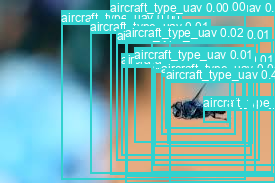

In [186]:
Image.fromarray(result[0].plot(pil=True))

In [187]:
# bboxes = torch.stack(
#     [
#         torch.Tensor(object_prediction.bbox.to_xywh()) / torch.Tensor([*result_sahi.image.size, *image.size]) for object_prediction in result_sahi.object_prediction_list]
# )

In [95]:
bboxes = torch.stack(
    [
        torch.Tensor(object_prediction.bbox.to_xyxy()) for object_prediction in result_sahi.object_prediction_list]
)

In [96]:
scores = torch.Tensor(
    [object_prediction.score.value for object_prediction in result_sahi.object_prediction_list]
)

In [97]:
categories = torch.Tensor(
    [object_prediction.category.id for object_prediction in result_sahi.object_prediction_list]
)

In [98]:
bboxes.shape

torch.Size([11, 4])

In [99]:
scores.shape

torch.Size([11])

In [100]:
torch.Tensor(result_sahi.object_prediction_list[0].bbox.to_xywh()) / torch.Tensor([*result_sahi.image.size, *image.size])


tensor([0.6557, 0.8968, 0.0156, 0.0179])

In [101]:
from ultralytics.engine.results import Results

In [102]:
category_mapping = dict(
    zip(
        list(map(int, detection_model.category_mapping.keys())),
        detection_model.category_mapping.values(),
    )
)

In [103]:
yolo_result = Results(np.array(result_sahi.image), path=None, names=category_mapping, boxes=None)

In [104]:
yolo_result = Results(np.array(result_sahi.image), path=None, names=category_mapping, boxes=torch.cat([bboxes, scores.unsqueeze(0).T, categories.unsqueeze(0).T], axis=1))

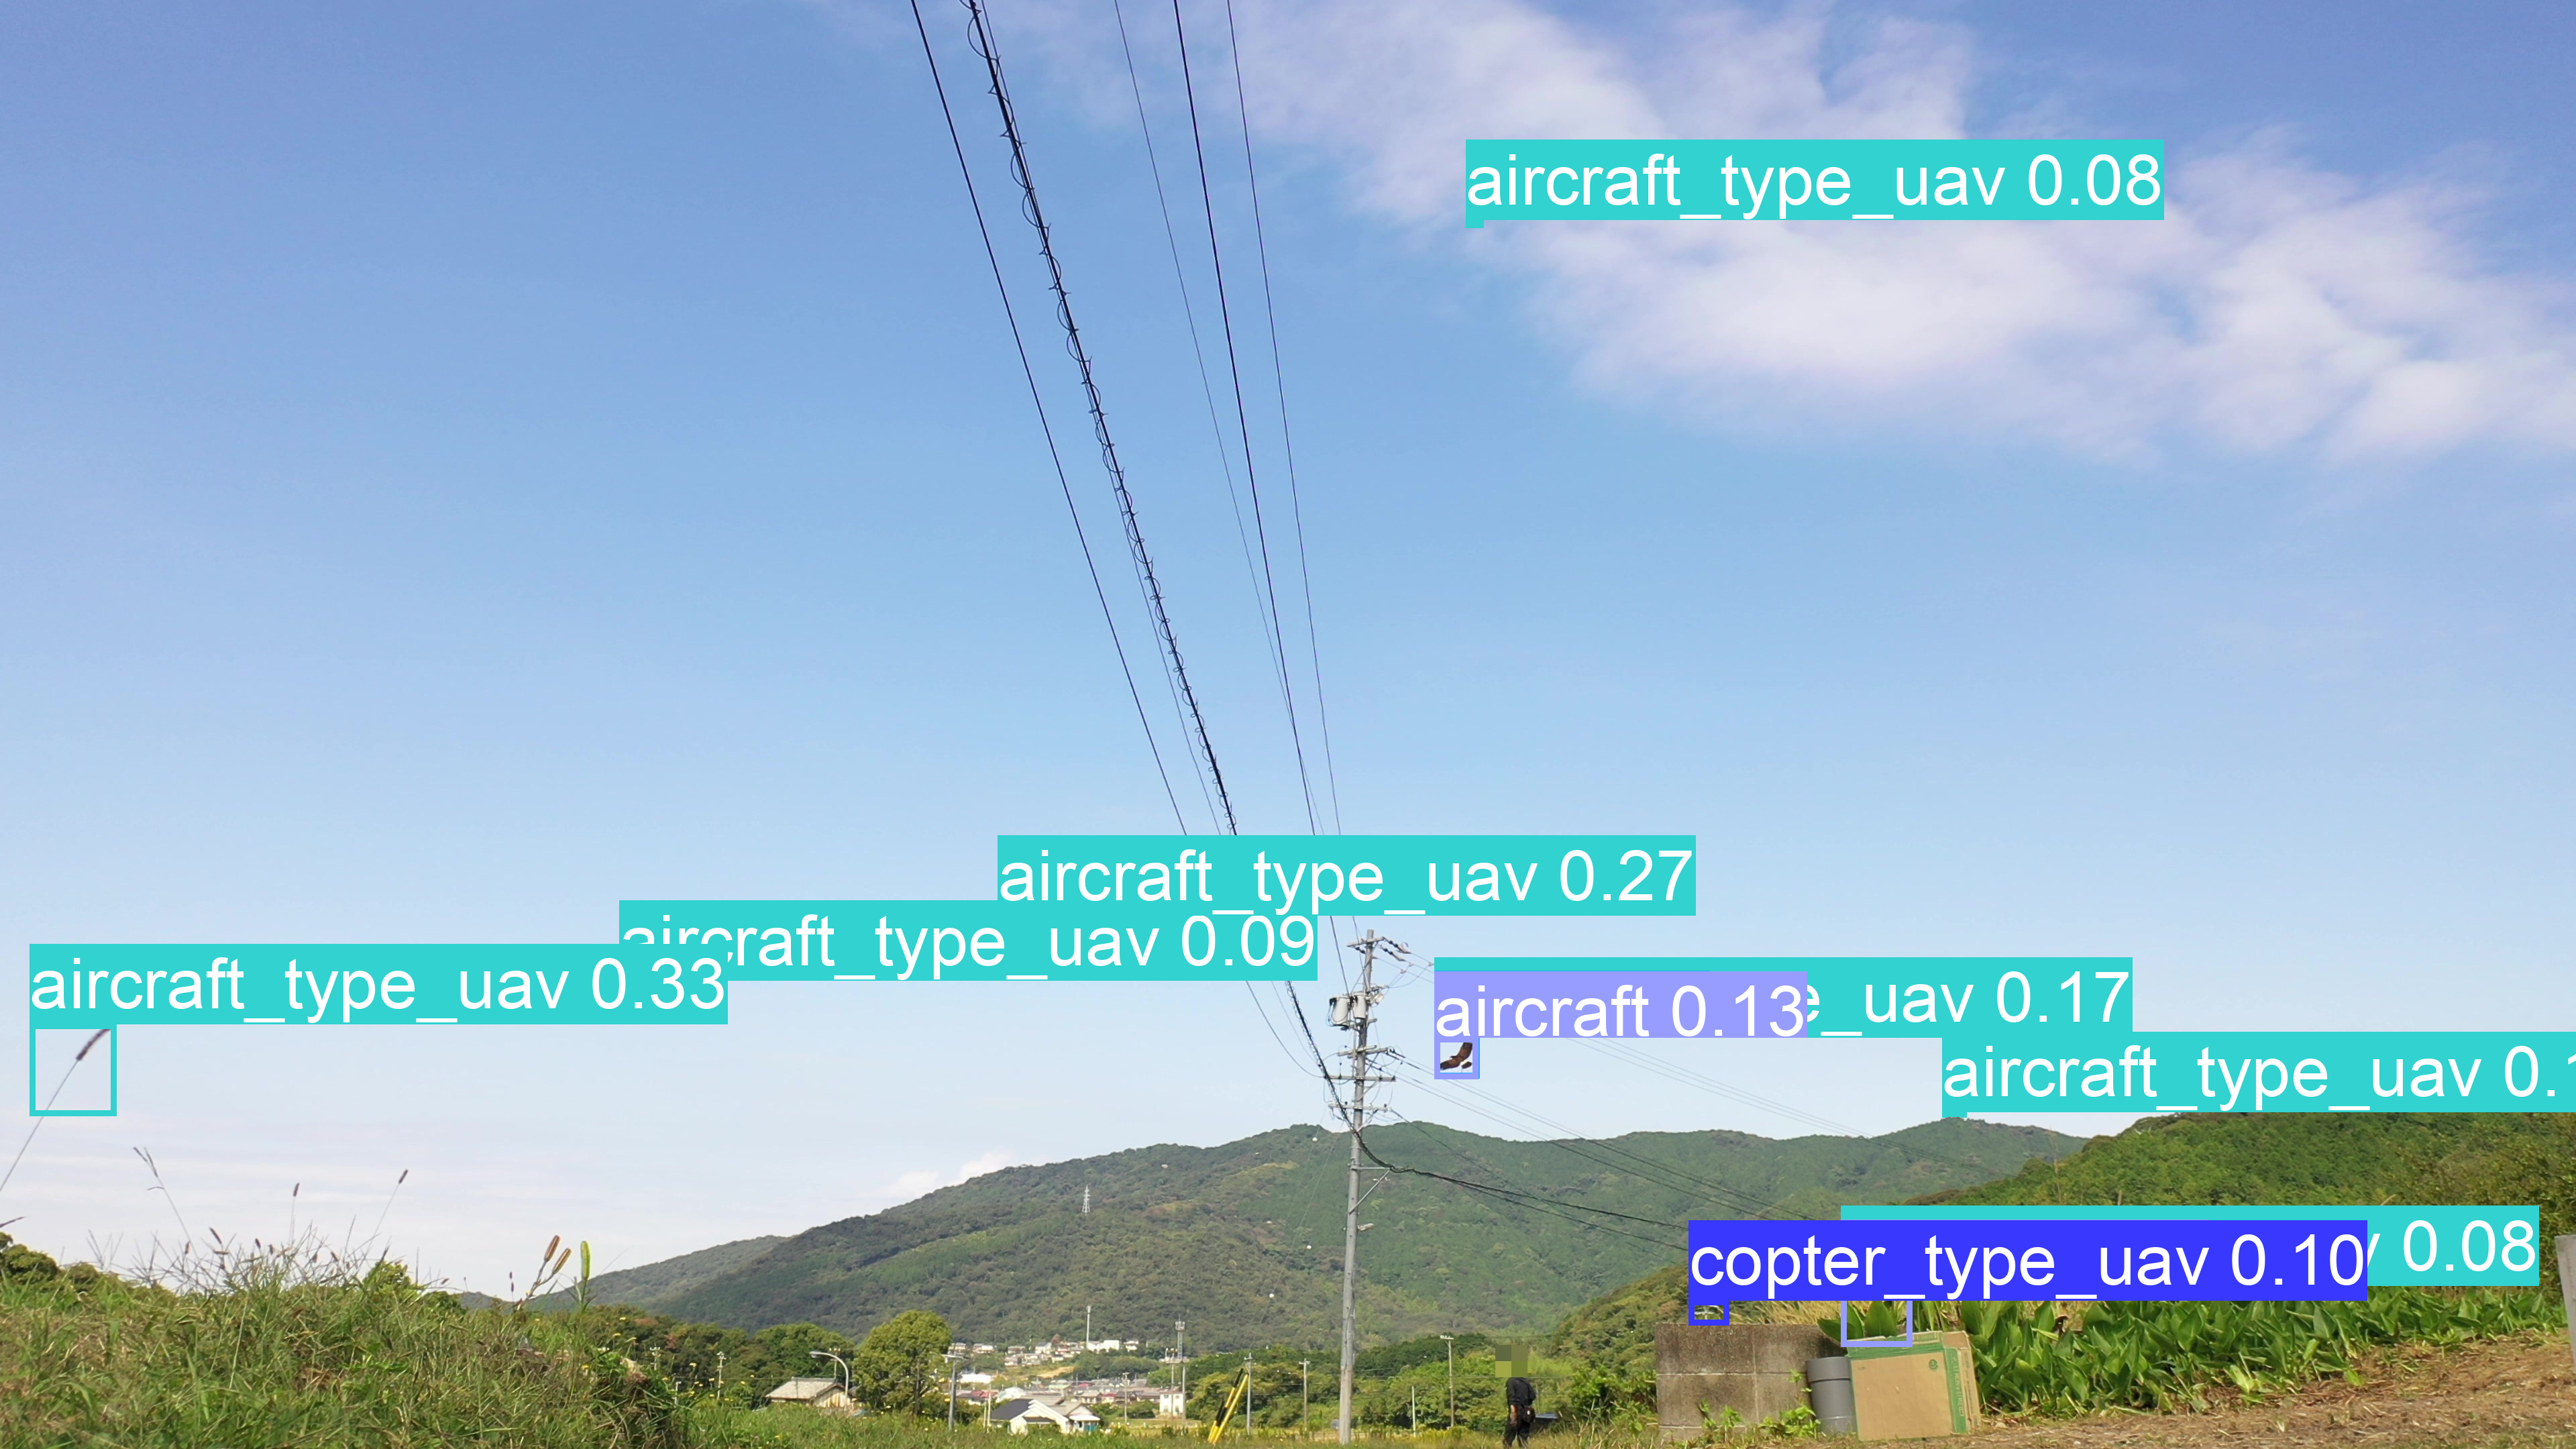

In [105]:
Image.fromarray(yolo_result.plot(pil=True))

In [19]:
object_prediction_list = result_sahi.object_prediction_list

In [20]:
object_prediction_list[0].to_coco_prediction()

CocoPrediction<
    image_id: None,
    bbox: [2141.2998046875, 1540.077392578125, 68.68798828125, 64.48388671875],
    segmentation: [],
    score: 0.7011141180992126,
    category_id: 3,
    category_name: bird,
    iscrowd: 0,
    area: 4429>

In [21]:
object_prediction_list[0].score.value

0.7011141180992126

In [22]:
import numpy as np

In [23]:
np.array(object_prediction_list[0].bbox.to_xywh())/[*image.size, *image.size]

array([    0.55763,       0.713,    0.017887,    0.029854])

In [10]:
def get_preds_dict_from_sahi(sahi_result, image):
    object_prediction_list = sahi_result.object_prediction_list
    # try:
    #     print(dir(object_prediction_list[0].bbox))
    # except:
    #     pass
    boxes = [list(object_prediction.bbox.to_xyxy()) for object_prediction in object_prediction_list]#/[*image.size, *image.size]) for object_prediction in object_prediction_list]
    labels = [object_prediction.category.id for object_prediction in object_prediction_list]
    scores = [object_prediction.score.value for object_prediction in object_prediction_list]
    return {
        'boxes': torch.FloatTensor(boxes),
        'scores': torch.FloatTensor(scores),
        'labels': torch.IntTensor(labels),
    }

In [11]:
with open("/home/slava/LCT_24/src/utils/val.txt", 'r') as f:
    image_paths = [Path(filename.strip()) for filename in f.readlines()]
labels_paths = [Path(*image_path.parts[:-2], 'labels', image_path.parts[-1]).with_suffix('.txt') for image_path in image_paths]

In [12]:
def yolo2pixelxyxy(image_label, image_size):
    shape = [
        (image_label[0]-image_label[2]/2)*image_size[0],
        (image_label[1]-image_label[3]/2)*image_size[1],
        (image_label[0]+image_label[2]/2)*image_size[0],
        (image_label[1]+image_label[3]/2)*image_size[1]
    ]
    return shape

In [13]:
def get_target_dict_from_file(label_path, image_size):
    target = {
        'boxes':[],
        'labels':[],
        }
    with open(label_path, 'r') as f:
        labels = [list(map(float, label.strip().split(" "))) for label in f.readlines()]
        for label in labels:
            target['boxes'].append(yolo2pixelxyxy(label[1:], image_size))
            target['labels'].append(label[0])
            
    target['boxes'] = torch.FloatTensor(target['boxes'])
    target['labels'] = torch.IntTensor(target['labels'])
    return target

In [14]:
def get_labels_from_paths(labels_paths):
    return [get_target_dict_from_file(label_path) for label_path in labels_paths]

In [15]:
def run_imgseq_validation(image_paths, labels_paths):
    preds = []
    targets = []
    for image_filename, label_filename in tqdm(zip(image_paths, labels_paths)):
        image = Image.open(image_filename)
        result_sahi = get_sliced_prediction(
            image,
            detection_model,
            slice_height=640,
            slice_width=640,
            overlap_height_ratio=0.2,
            overlap_width_ratio=0.2,
            verbose=False,
        )
        pred = get_preds_dict_from_sahi(result_sahi, image)
        preds.append(pred)

        targets.append(get_target_dict_from_file(label_filename, image.size))
    return preds,targets

In [17]:
preds,targets = run_imgseq_validation(image_paths[:5],labels_paths[:5])

5it [00:03,  1.53it/s]


In [ ]:
preds[90]

{'boxes': tensor([[0.3652, 0.3220, 0.1594, 0.1594]]),
 'scores': tensor([0.8568]),
 'labels': tensor([2], dtype=torch.int32)}

In [ ]:
targets[90]

{'boxes': tensor([[0.4442, 0.4049, 0.1597, 0.1603]]),
 'labels': tensor([2], dtype=torch.int32)}

In [ ]:
get_target_dict_from_file(labels_paths[0])

{'boxes': tensor([[0.5909, 0.4451, 0.5656, 0.2588]]),
 'labels': tensor([1], dtype=torch.int32)}

In [ ]:
get_preds_dict_from_sahi(result_sahi, image)

{'boxes': tensor([[0.5576, 0.7130, 0.0179, 0.0299]]),
 'scores': tensor([0.7011]),
 'labels': tensor([3], dtype=torch.int32)}

In [20]:
metrics = IntersectionOverUnion(box_format='xyxy',)
metrics_res = metrics.forward(
    preds,
    targets,
)

IndexError: index 2 is out of bounds for dimension 1 with size 0

In [ ]:
metrics_res.pop('classes')

{'map': 0.4603724777698517,
 'map_50': 0.475181519985199,
 'map_75': 0.475181519985199,
 'map_small': -1.0,
 'map_medium': -1.0,
 'map_large': 0.4603724777698517,
 'mar_1': 0.4706130623817444,
 'mar_10': 0.4706130623817444,
 'mar_100': 0.4706130623817444,
 'mar_small': -1.0,
 'mar_medium': -1.0,
 'mar_large': 0.4706130623817444,
 'map_per_class': -1.0,
 'mar_100_per_class': -1.0,
 'classes': tensor([0, 1, 2, 3, 4], dtype=torch.int32)}

In [ ]:
for key in metrics_res:
    metrics_res[key] = float(metrics_res[key])

ValueError: only one element tensors can be converted to Python scalars

In [ ]:
iou = IntersectionOverUnion(box_format='xywh')

In [ ]:
iou.forward(
    preds,
    targets,
)

IndexError: index 2 is out of bounds for dimension 1 with size 0

Debugging predict.py